In [31]:
import numpy as np
def pp(x,y):
    return np.array([x,y])

# coordinates of Kimberly's house
K = (xk,yk) = pp(4,0)
# coordinates of Bob's house
B = (xb,yb) = pp(0,0)
# coordinates of Jack's house
J = (xj,yj) = pp(-2,-4)
# coordinates of Janet's house
N = (xn,yn) = pp(-2,-1)

# the ratios
(a,b) = pp(3,4)

# expected solution 
H = (xsoln,ysoln) = pp(-2,0)

In [32]:
def dist2(x0,y0,x1,y1):
    "distance between (x0,y0) and (x1,y1) squared"
    return (x0-x1)**2 + (y0-y1)**2

# use the numpy sqrt function, because it is the most general
import numpy as np

def distance(x0,y0,x1,y1):
    "distance between (x0,y0) and (x1,y1)"
    return np.sqrt(dist2(x0,y0,x1,y1))

In [33]:
try:
    from jp_gene_viz import graph_diagram
    from jp_gene_viz.addenda import Addenda
except ImportError:
    print("Sorry, this part requires jp_gene_viz too...")
else:
    add = Addenda("graph.data")
    G = graph_diagram.GraphDiagramWidget(add, "Basic")
    G.show()
    G.snap_click()
    G.view_checkbox.value = False

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# allow import without install
import sys
if ".." not in sys.path:
    sys.path.append("..")
from jp_svg_canvas import cartesian_svg

def positions():
    D = cartesian_svg.sdoodle(-3, -6, 6, 2, html_width=700)
    D.axes(-2.5, -5.5)
    # rotate text 55 degrees.
    D.rotate = -55
    distances = {}
    for (pos, name) in [(K, "Kim"), (B, "Bob"), (J, "Jack"), (N, "Janet"), (H, "me")]:
        (x, y) = pos
        D.color = "red"
        # draw circles at each house and add the associated name
        D.circle(name, x, y, 0.1)
        D.text(name, x + 0.2, y - 0.2, name)
        if pos is not H:
            # display the connecting line and distance to "me"
            d = distance(xsoln, ysoln, x, y)
            distances[name] = d
            D.color = "blue"
            D.line(name, xsoln, ysoln, x, y)
            # find the midpoint between H and pos, and display distance there.
            (x_mid, y_mid) = (H + pos) * 0.5
            D.text(name, x_mid + 0.1, y_mid - 0.1, "%3.2f to %s" % (d, name))
    D.color = "green"
    D.rotate = None
    D.text("a", 1.5, -4, "Jack/Janet = b = %s = %s" % (b, distances["Jack"]/distances["Janet"]))
    D.text("a", 1.5, -4.5, "Kim/Bob = a = %s = %s" % (a, distances["Kim"]/distances["Bob"]))
    return D
D = positions()
D.embed()

<IPython.core.display.Javascript object>

In [35]:
import sympy as s
s.init_printing()

x,y = s.symbols("x y")

JackDist2 = dist2(x, y, xj, yj)
JackDist2

In [36]:
JanetDist2 = dist2(x, y, xn, yn)
Jack_Janet_shape = s.Eq( JackDist2, JanetDist2 * b**2 )
Jack_Janet_shape

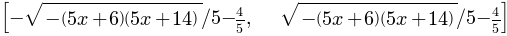

In [37]:
ysolutions = s.solve(Jack_Janet_shape, y)
ysolutions

In [38]:
(ysoln0, ysoln1) = ysolutions
yfunction0 = s.lambdify(x, ysoln0)
yfunction1 = s.lambdify(x, ysoln1)

def positions2():
    D2 = positions()
    D2.other_attributes = {"stroke-width": 3}
    D2.color = "#e90"
    D2.plot_y(yfunction0)
    D2.color = "#0e9"
    D2.plot_y(yfunction1)
    return D2

D2 = positions2()
D2.embed()

In [39]:
KimDist2 = dist2(x, y, xk, yk)
BobDist2 = dist2(x, y, xb, yb)
Kim_Bob_shape = s.Eq( KimDist2, BobDist2 * a**2 )
Kim_Bob_shape

In [40]:
ysolutionsKB = s.solve(Kim_Bob_shape, y)
(ysoln0KB, ysoln1KB) = ysolutionsKB
yfunction0KB = s.lambdify(x, ysoln0KB)
yfunction1KB = s.lambdify(x, ysoln1KB)
# Make the drawing area bigger in the Y positive direction...
#D3 = cartesian_svg.sdoodle(-3, -6, 6, 2, html_width=400)

def positions3():
    D3 = positions2()
    D3.color = "#9e0"
    D3.plot_y(yfunction0KB)
    D3.color = "#09e"
    D3.plot_y(yfunction1KB)
    return D3
    
D3 = positions3()
D3.embed()

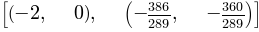

In [41]:
# Finding the other solution
points = s.solve( [Kim_Bob_shape, Jack_Janet_shape], x, y)
points

In [42]:
# checking the second solution...  Override the global variables
H = (xsoln,ysoln) = pp(-386/289.0, -360/289.0)

In [43]:
# Do the plot with the overridden values
D3 = positions3()
D3.embed()

In [44]:
KB2 = s.Eq(Kim_Bob_shape.lhs - Kim_Bob_shape.rhs, 0)
KB2

In [45]:
KB3 = s.expand(KB2)
KB3

In [46]:
KB4 = s.Eq(-KB3.lhs/8, 0)
KB4

In [47]:
(x_c, y_c, r) = s.symbols("x_c y_c r")

In [48]:
circle = s.Eq((x - x_c)**2 + (y - y_c) ** 2 - r**2, 0)
circle

In [49]:
s.expand(circle)

In [50]:
x_eq = s.Eq(-2*x_c, 1)
y_eq = s.Eq(-2*y_c, 0)
c_eq = s.Eq(y_c**2 + x_c**2 - r**2, -2)
(x_eq, y_eq, c_eq)

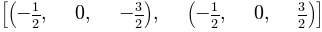

In [51]:
s.solve([x_eq, y_eq, c_eq], x_c, y_c, r)

In [52]:
# Do the plot with the overridden values
D3 = positions3()
D3.color = "pink"
D3.circle("center", -0.5, 0, 0.1)
D3.text("ct", -0.5, 0.1, "KB center")
D3.embed()

In [69]:
b, c, d = s.symbols("b c d")
c_zero1 = x**2 + y**2 + b*x + c*y + d
x_c, y_c, radius = s.symbols("x_c y_c radius")
c_zero2 = dist2(x, y, x_c, y_c) - radius ** 2
(c_zero1, c_zero2)

In [71]:
(c_zero1.expand(), c_zero2.expand())

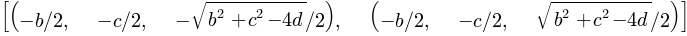

In [72]:
b1 = -2*x_c
c1 = -2*y_c
d1 = -radius**2 + x_c**2 + y_c **2
beq = s.Eq(b, b1)
deq = s.Eq(d, d1)
ceq = s.Eq(c, c1)
s.solve([beq, deq, ceq], x_c, y_c, radius)

In [68]:
Q = (1,4)
P1 = (5, 3)
P2 = (-2, -1)
r1 = distance(Q[0], Q[1], P1[0], P1[1])
r2 = distance(Q[0], Q[1], P2[0], P2[1])

def label_line(D, name, x1, y1, x2, y2, color="black", offset=0.1):
    D.line(name, x1, y1, x2, y2, color)
    D.text(name, (x1+x2)/2+offset, (y1+y2)/2+offset, name, color)

D = cartesian_svg.sdoodle(-3, -3, 6, 6, html_width=700)
D.circle("circle1", P1[0], P1[1], r1, "#aff")
D.circle("circle2", P2[0], P2[1], r2, "#faf")
label_line(D, "r1", P1[0], P1[1], Q[0], Q[1], "blue")
label_line(D, "r2", P2[0], P2[1], Q[0], Q[1], "red")
label_line(D, "d(P1, P2)", P1[0], P1[1], P2[0], P2[1])
for (name, (xp, yp)) in [("Q", Q), ("P1", P1), ("P2", P2)]:
    D.circle(name, xp, yp, 0.1)
    D.text(name, xp+0.1, yp+0.1, name)
D.axes(0,0)
D.embed()

In [102]:
from jp_svg_canvas.transforms2d import *
# Translate P2 to the origin
trans = translate(-P2[0], -P2[1])
# Rotate line P1 to P2 to the x axis.
rot = direction_rotate(P1[0]-P2[0], -(P1[1]-P2[1]))
# scale by 1/r2
scl = scale(1.0/r2)
# combine them in the right order
normalize = compose(trans, compose(rot, scl))

# Transform the points
Qn = tapply(normalize, Q[0], Q[1])
P1n = tapply(normalize, P1[0], P1[1])
P2n = tapply(normalize, P2[0], P2[1])
r1n = distance(Qn[0], Qn[1], P1n[0], P1n[1])
r2n = distance(Qn[0], Qn[1], P2n[0], P2n[1])

# redraw the diagram
D = cartesian_svg.sdoodle(-1, -1, 2, 1, html_width=700)
D.circle("circle1", P1n[0], P1n[1], r1n, "#aff")
D.circle("circle2", P2n[0], P2n[1], r2n, "#faf")
label_line(D, "r = r1/r2", P1n[0], P1n[1], Qn[0], Qn[1], "blue")
label_line(D, "1", P2n[0], P2n[1], Qn[0], Qn[1], "red")
label_line(D, "x'=d(P1,P2)/r2", P1n[0], P1n[1], P2n[0], P2n[1], color="red", offset=-0.1)
for (name, (xp, yp)) in [("Qn", Qn), ("P1n", P1n), ("O", P2n)]:
    D.circle(name, xp, yp, 0.03)
    D.text(name, xp+0.1, yp+0.1, name)
theta = u"\u03F4"
D.text(theta, 0.3, 0.05, theta, "green")
label_line(D, "sin"+theta, Qn[0], Qn[1], Qn[0], 0, "green", offset=0.02)
#label_line(D, "- sin"+theta, Qn[0], -Qn[1], Qn[0], 0, "green", offset=0.02)
label_line(D, "cos"+theta, 0, 0, Qn[0], 0, "green", offset=0.02)
D.text(None, Qn[0], -Qn[1], "(cos%s, - sin%s)" % (theta, theta), "green")
D.axes(0,0)
D.embed()

In [95]:
cost, sint, xp, r = s.symbols(r"cos\theta sin\theta x' r")
cosine_law = s.Eq(r**2, 1**2 + xp**2 - 2*1*xp*cost)
cosine_law

In [96]:
s.solve([cosine_law], cost)

In [117]:
import houses
reload(houses)

<module 'houses' from 'houses.py'>

In [119]:
L = houses.Locations()

In [114]:
%debug

> /Users/awatters/repos/jp_svg_canvas/examples/houses.py(200)locations2()
    199         cost = (-r*r + xp*xp + 1)/(2*xp)
--> 200         sint = math.sqrt(1 - cost*cost)
    201         trans = tr.translate(P2x, P2y)

ipdb> print r
1.84876227876
ipdb> xp
2.955374502310351
ipdb> r
